In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio

In [23]:
def gif_sol(Y,t,x):  
  filenames = []  
  for i in range(len(t)):    
    plt.title(f'Solucion a t = {t[i]}')
    plt.plot(x,Y[i],'o')
    # create file name and append it to a list
    filename = f'{i}.png'    
    for j in range(10):       
       filenames.append(filename)                 
    # save frame
    plt.savefig(filename)
    plt.close()  
  # build gif
  with imageio.get_writer('solution.gif', mode='I',duration=0.001) as writer:    
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)          
  # Remove files 
  for filename in set(filenames):    
    os.remove(filename)
def linear(x):
   sol = np.where((x<-1) | (x>1),0,1) * ((x+1)/2)
   return sol.reshape(len(x),1)
def solution(n,t):  
  sol = np.zeros(len(n))
  for i in range(len(n)):
    x = n[i]
    t_0 = t[0]
    lower = t_0 - 1
    uper = 1 - t_0    
    sol[i] = np.where((x<lower) | (x>uper),0,1) * 1/(2-2*t_0) 
  return sol.reshape((len(n),1))
def simulacion(condicion_inicial,h):
  rand_pos = np.random.randint(0,len(condicion_inicial))
  for i in range(len(condicion_inicial)):
    while i == rand_pos:
     rand_pos = np.random.randint(0,len(condicion_inicial))
    if condicion_inicial[i] > condicion_inicial[rand_pos]:
        condicion_inicial[i] -= h
        condicion_inicial[rand_pos] += h
    if condicion_inicial[i] <= condicion_inicial[rand_pos]:
        condicion_inicial[i] += h
        condicion_inicial[rand_pos] -= h
  return(condicion_inicial)     

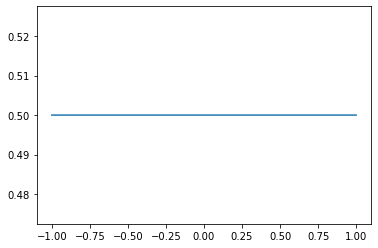

In [25]:
N = 10000  
h = 0.01
nt = 1000
agentes = np.linspace(-1,1,N)
tiempo = np.linspace(0,1,nt)
cond_ini = solution(agentes,tiempo)
plt.plot(agentes,cond_ini,'o')
plt.show()

test = []
for i in range(len(tiempo)):
    test.append(cond_ini)
    u = simulacion(cond_ini,h)
    cond_ini = u


In [26]:
gif_sol(test,tiempo,agentes)

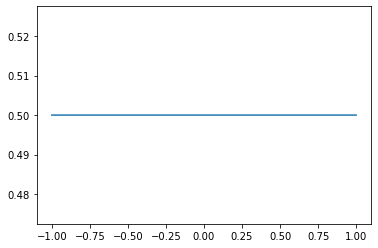

In [17]:
plt.plot(agentes,solution(agentes,tiempo))